In [1]:
import warnings
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import KeyedVectors


import gensim
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string



warnings.filterwarnings("ignore")   

In [2]:
data = pd.read_csv("mix_data.csv")
data[ data["label"] == "job_applicant"].head()

,email_body,label
0,"Dear Hiring Manager,\n\nI wish to inquire abou...",job_applicant
1,"Dear [Company Name] Team,\n\nHaving followed G...",job_applicant
2,Please accept this email as my formal applicat...,job_applicant
3,"Dear Hiring Manager,\n\nI am excited to apply ...",job_applicant
4,"Hi there,\n\nHaving followed Synergy Systems's...",job_applicant


In [3]:
class_counts  = data["label"].value_counts()

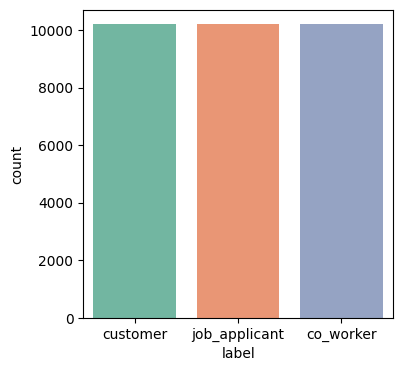

In [4]:
plt.figure(figsize = (4, 4 ) )
sns.countplot( data = data ,  x = "label" , order = class_counts.index , palette = "Set2")
plt.show()

In [3]:
data = pd.read_pickle("large_data.pkl") 
data.head()

,email_body,label,tokens,average_vector
0,"Dear Hiring Manager,\n\nI wish to inquire abou...",job_applicant,"[dear, hiring, manager, wish, inquire, possibi...","[-0.02783203125, 0.06353494395380435, 0.024629..."
1,"Dear [Company Name] Team,\n\nHaving followed G...",job_applicant,"[dear, company, team, having, follow, global, ...","[-0.06311394186580882, 0.02129049862132353, -0..."
2,Please accept this email as my formal applicat...,job_applicant,"[accept, email, formal, application, graphic, ...","[-0.037270210884712836, 0.0074240194784628375,..."
3,"Dear Hiring Manager,\n\nI am excited to apply ...",job_applicant,"[dear, hiring, manager, excited, apply, graphi...","[-0.0521661376953125, 0.014130859375, -0.00042..."
4,"Hi there,\n\nHaving followed Synergy Systems's...",job_applicant,"[hi, having, follow, synergy, systems, work, t...","[-0.02624359130859375, 0.010528782435825893, -..."


In [74]:
data = pd.read_pickle("small_data.pkl")

In [75]:
import numpy as np
import pandas as pd

def add_label_noise_by_class(data, label_col='label', random_state=42):
    """
    Returns a new DataFrame where a percentage of labels in each class are randomly flipped to a different class.
    - 10% of 'job_applicant' labels
    - 5% of 'customer' labels
    - 3% of 'co_worker' labels
    are flipped to another class.

    Parameters:
    - data: pandas DataFrame (original data)
    - label_col: str, name of the label column
    - random_state: int, seed for reproducibility

    Returns:
    - noisy_data: pandas DataFrame, with noisy labels
    """
    np.random.seed(random_state)
    noisy_data = data.copy()
    labels = noisy_data[label_col].unique()

    # Define noise percentages for each class
    noise_dict = {'job_applicant': 0.15, 'customer': 0.20, 'co_worker': 0.12}

    indices_to_flip = []
    for label, prop in noise_dict.items():
        label_indices = noisy_data[noisy_data[label_col] == label].index
        n_to_flip = int(prop * len(label_indices))
        if n_to_flip > 0:
            flip_indices = np.random.choice(label_indices, size=n_to_flip, replace=False)
            indices_to_flip.extend(flip_indices)

    # Function to flip to a random different label
    def random_other_label(orig_label):
        possible_labels = [lbl for lbl in labels if lbl != orig_label]
        return np.random.choice(possible_labels)

    noisy_data.loc[indices_to_flip, label_col] = noisy_data.loc[indices_to_flip, label_col].apply(random_other_label)
    return noisy_data

noisy_data = add_label_noise_by_class(data, label_col='label', random_state=42)

In [76]:
X = data["average_vector"].to_list()
y = data["label"].to_list()

In [77]:
X_train , X_test , y_train , y_test = train_test_split ( 
    X , 
    y , 
    test_size = 0.2 , 
    random_state = 42 ,
    shuffle = True
)

In [ ]:
import numpy as np


# Train with shuffled labels
model = LogisticRegression()
model.fit(X_train, y_train)
logistic_score = model.score(X_test, y_test)

model_1 = SVC()
model_1.fit(X_train, y_train)
svm_score = model_1.score(X_test, y_test)

model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train, y_train)
knn_score = model_2.score(X_test, y_test)

print(f"LogisticRegression Score is {logistic_score * 100: .2f} %")
print(f"SVM score is                {svm_score * 100: .2f} %")
print(f"KNN score is                {knn_score * 100: .2f} %")


In [ ]:
import spacy 
nlp_small = spacy.load("en_core_web_sm") # small file 
stop_words_small = nlp_small.Defaults.stop_words

def tokenizer(sentence):
    punctuations = string.punctuation
                   
    doc = nlp_small(sentence)  # -> tokenization

    mytokens = []
    for word in doc:
        lemma = word.lemma_.lower().strip() # removing the whitespace & lemmatization and lowercuase
        mytokens.append(lemma)

    filtered_tokens = []
    for word in mytokens:
        if word not in stop_words_small and word not in punctuations:
            filtered_tokens.append(word)

    return filtered_tokens
wv = KeyedVectors.load("word2vec-google-news-300.model")
import numpy as np
def avg_vector(sent):
    vector_size = wv.vector_size
    average_vector = np.zeros(vector_size)
    valid_word_count = 0

    for word in sent:
        if word in wv:
            average_vector += wv[word]
            valid_word_count += 1

    if valid_word_count > 0:
        average_vector /= valid_word_count
    return average_vector

In [ ]:
def predict_(sentence):
    words = tokenizer(sentence)
    average_vector = avg_vector(words)
    return model.predict([average_vector])

In [69]:
y_pred = model.predict(X_test) 

<Figure size 300x300 with 0 Axes>

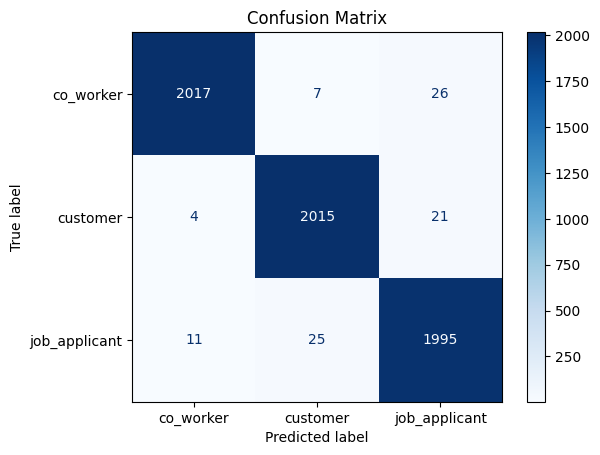

In [70]:
cm = confusion_matrix (y_test , y_pred , labels = model.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize = (3 , 3))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

    co_worker       0.99      0.98      0.99      2050
     customer       0.98      0.99      0.99      2040
job_applicant       0.98      0.98      0.98      2031

     accuracy                           0.98      6121
    macro avg       0.98      0.98      0.98      6121
 weighted avg       0.98      0.98      0.98      6121



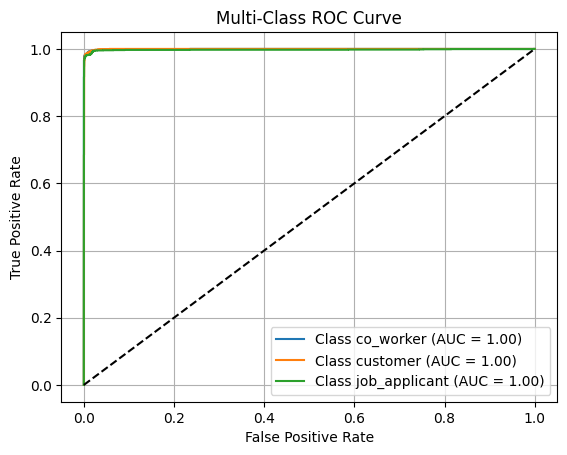

<Figure size 1000x800 with 0 Axes>

In [72]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

classes = model.classes_  
y_test_bin = label_binarize(y_test, classes=classes) #[customer] -> [0 , 1 , 0] ||| co_worker -> [1 , 0 , 0]
y_score = model.predict_proba(X_test)  

fpr = dict()
tpr = dict()
roc_auc = dict()
tresh_hold_counter = 0 
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i],drop_intermediate=False)
    tresh_hold_counter = len(_)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})" ,)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.figure(figsize = (10 , 8 ) )

plt.show()
